In [1]:
import pandas as pd
import numpy as np
import imageio
from skimage.transform import resize
from scipy import misc 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns

C:\Users\hrith\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hrith\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hrith\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau 
from keras.utils import np_utils, normalize

C:\Users\hrith\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hrith\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hrith\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hrith\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [4]:
# Using this to supress warnings from scipy in the meantime
import warnings
warnings.filterwarnings("ignore")

In [5]:
PATH_DATA = './dataset/'

In [6]:
df = pd.read_csv(PATH_DATA + 'HAM10000_metadata.csv')

In [7]:
df.shape

(10015, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             9958 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [9]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [10]:
df['age'].fillna(round(df['age'].mean()),inplace=True)

In [11]:
df.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,10015.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0005263,ISIC_0024953,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.864603,NaN,NaN
std,NaN,NaN,NaN,NaN,16.920255,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [12]:
df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
4947,HAM_0000466,ISIC_0027749,nv,follow_up,45.0,female,lower extremity
1295,HAM_0003031,ISIC_0030445,mel,histo,75.0,male,back
5530,HAM_0000804,ISIC_0029863,nv,follow_up,50.0,male,trunk
1563,HAM_0000048,ISIC_0032774,mel,histo,75.0,male,lower extremity
9209,HAM_0006600,ISIC_0028891,nv,consensus,25.0,female,lower extremity
3531,HAM_0002353,ISIC_0028705,nv,follow_up,40.0,female,foot
9727,HAM_0007555,ISIC_0030602,akiec,histo,60.0,male,upper extremity
5895,HAM_0002214,ISIC_0027465,nv,follow_up,75.0,male,trunk
1326,HAM_0007538,ISIC_0031941,mel,histo,55.0,male,trunk
2254,HAM_0001607,ISIC_0028508,mel,histo,75.0,male,back


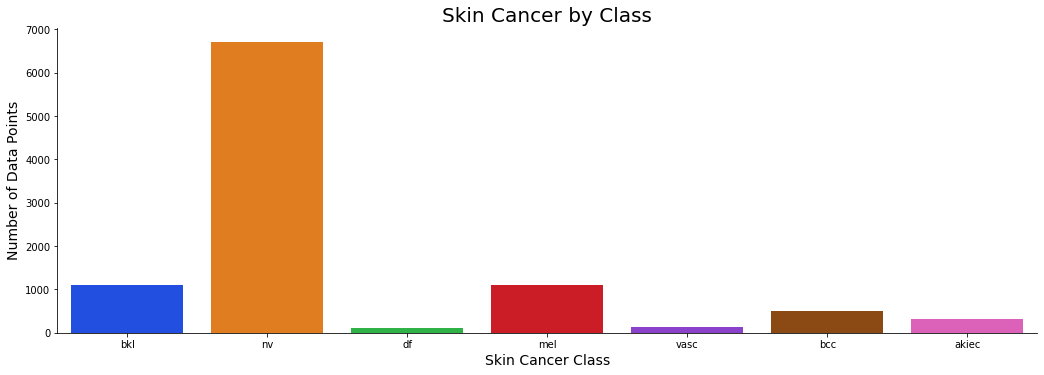

In [18]:
#checking the distribution of the values
g = sns.catplot(x="dx", kind="count", palette='bright', data=df)
g.fig.set_size_inches(16, 5)

g.ax.set_title('Skin Cancer by Class', fontsize=20)
g.set_xlabels('Skin Cancer Class', fontsize=14)
g.set_ylabels('Number of Data Points', fontsize=14)

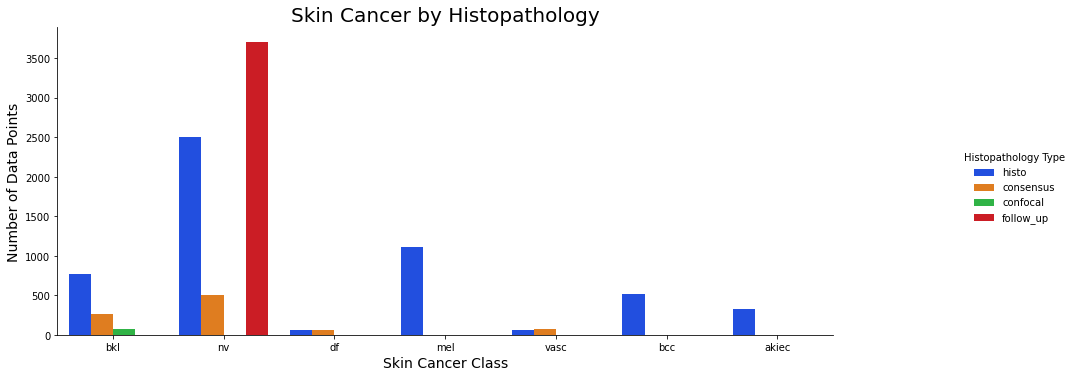

In [19]:
# Skin Cancer is confirmed via Hispathology, checking the breakdown for each type
g = sns.catplot(x="dx", kind="count", hue="dx_type", palette='bright', data=df)
g.fig.set_size_inches(16, 5)

g.ax.set_title('Skin Cancer by Histopathology', fontsize=20)
g.set_xlabels('Skin Cancer Class', fontsize=14)
g.set_ylabels('Number of Data Points', fontsize=14)
g._legend.set_title('Histopathology Type')

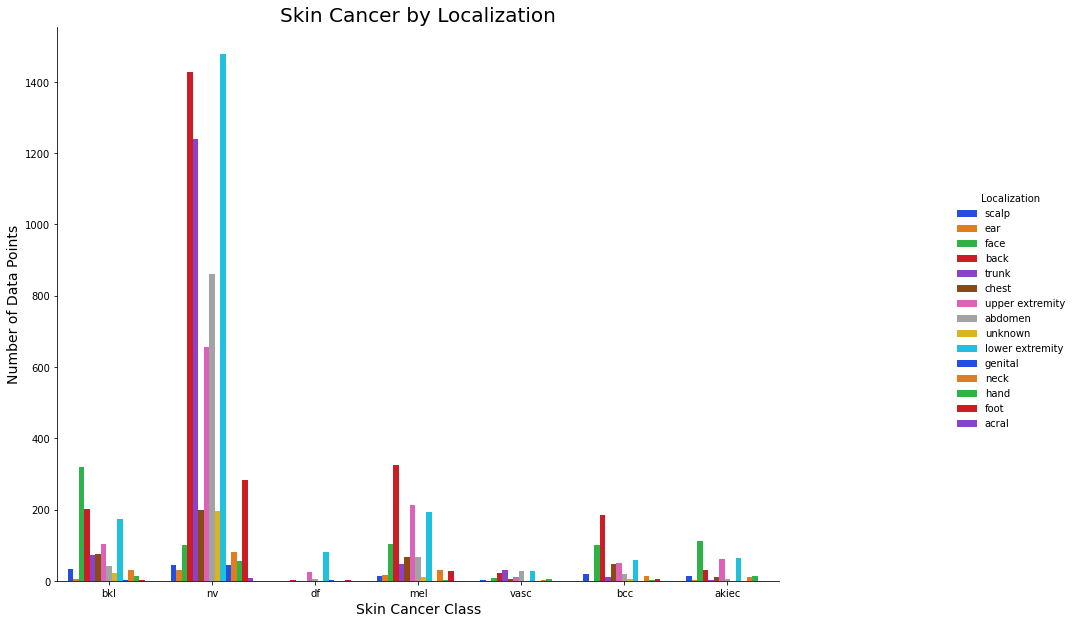

In [20]:
# Skin Cancer occurence body localization
g = sns.catplot(x="dx", kind="count", hue="localization", palette='bright', data=df)
g.fig.set_size_inches(16, 9)

g.ax.set_title('Skin Cancer by Localization', fontsize=20)
g.set_xlabels('Skin Cancer Class', fontsize=14)
g.set_ylabels('Number of Data Points', fontsize=14)
g._legend.set_title('Localization')

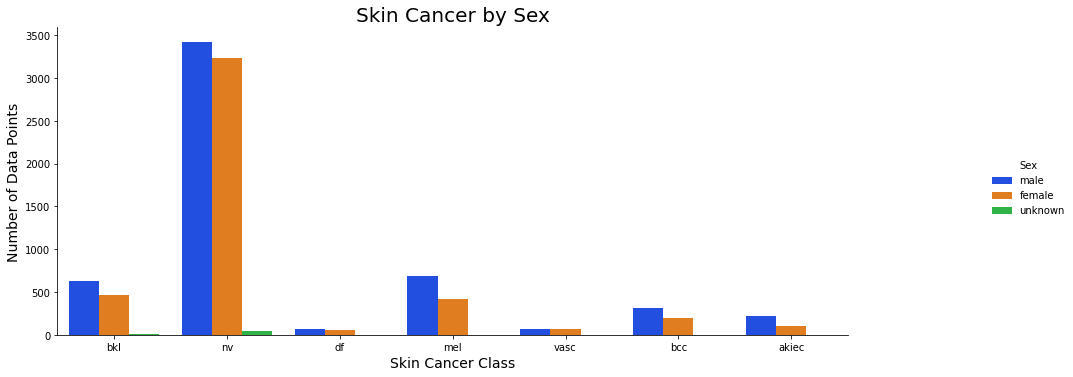

In [21]:
# Skin Cancer occurence by Gender
g = sns.catplot(x="dx", kind="count", hue="sex", palette='bright', data=df)
g.fig.set_size_inches(16, 5)

g.ax.set_title('Skin Cancer by Sex', fontsize=20)
g.set_xlabels('Skin Cancer Class', fontsize=14)
g.set_ylabels('Number of Data Points', fontsize=14)
g._legend.set_title('Sex')

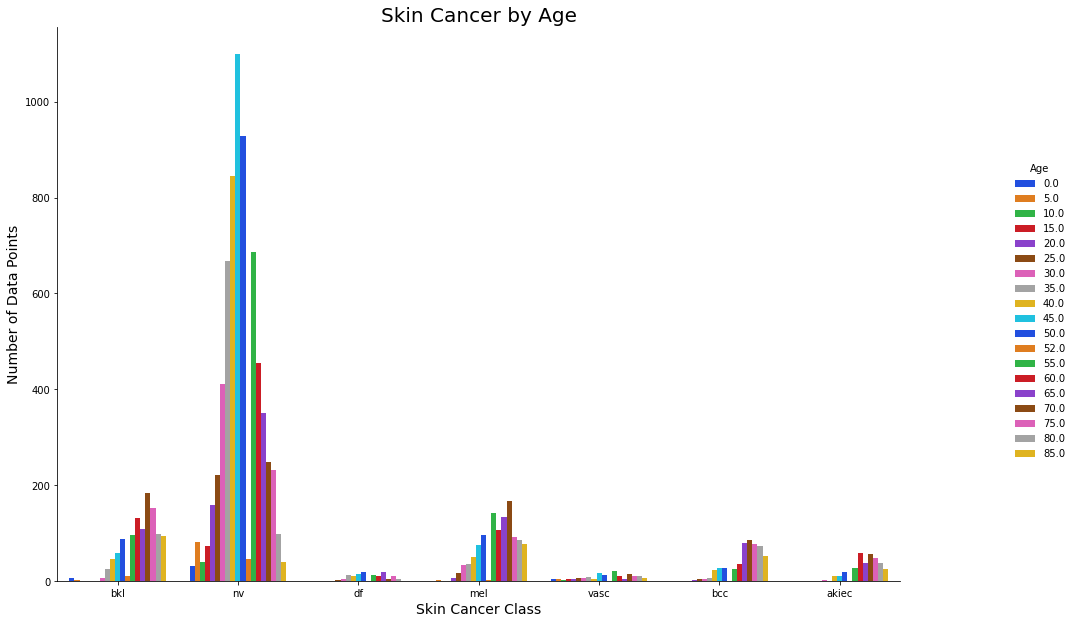

In [22]:
# Skin Cancer occurence by Age
g = sns.catplot(x="dx", kind="count", hue="age", palette='bright', data=df)
g.fig.set_size_inches(16, 9)

g.ax.set_title('Skin Cancer by Age', fontsize=20)
g.set_xlabels('Skin Cancer Class', fontsize=14)
g.set_ylabels('Number of Data Points', fontsize=14)
g._legend.set_title('Age')

In [23]:
# Preparing Train and Test Data
df = df.set_index('image_id')
y = pd.get_dummies(df[['dx']])
y_train, y_test = train_test_split(y, test_size=0.1, random_state=42)

In [24]:
df

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...
ISIC_0033084,HAM_0002867,akiec,histo,40.0,male,abdomen
ISIC_0033550,HAM_0002867,akiec,histo,40.0,male,abdomen
ISIC_0033536,HAM_0002867,akiec,histo,40.0,male,abdomen


In [25]:
y

,dx_akiec,dx_bcc,dx_bkl,dx_df,dx_mel,dx_nv,dx_vasc
image_id,,,,,,,
ISIC_0027419,0,0,1,0,0,0,0
ISIC_0025030,0,0,1,0,0,0,0
ISIC_0026769,0,0,1,0,0,0,0
ISIC_0025661,0,0,1,0,0,0,0
ISIC_0031633,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
ISIC_0033084,1,0,0,0,0,0,0
ISIC_0033550,1,0,0,0,0,0,0
ISIC_0033536,1,0,0,0,0,0,0


In [26]:
y_train.shape, y_test.shape

((9013, 7), (1002, 7))

In [27]:
#Loading all Images and Resizing to 30%, with normalization

TARGET_SIZE = (180, 135)

x_train, x_test = [], []
for image_id in y_train.index.values:
    image = misc.imread('./dataset/Images/{}.jpg'.format(image_id))
    image = misc.imresize(image, size=TARGET_SIZE, interp='nearest')
    image = normalize(image)
    x_train.append(image)
    print('Completed processing {}.jpg'.format(image_id))

x_train = np.asarray(x_train)

for image_id in y_test.index.values:
    image = misc.imread('./dataset/Images/{}.jpg'.format(image_id))
    image = misc.imresize(image, size=TARGET_SIZE, interp='nearest')
    image = normalize(image)
    x_test.append(image)
    print('Completed processing {}.jpg'.format(image_id))

x_test = np.asarray(x_test)

Completed processing ISIC_0029650.jpg
Completed processing ISIC_0027956.jpg
Completed processing ISIC_0025154.jpg
Completed processing ISIC_0034101.jpg
Completed processing ISIC_0028149.jpg
Completed processing ISIC_0030191.jpg
Completed processing ISIC_0026801.jpg
Completed processing ISIC_0025572.jpg
Completed processing ISIC_0028332.jpg
Completed processing ISIC_0028530.jpg
Completed processing ISIC_0027034.jpg
Completed processing ISIC_0027030.jpg
Completed processing ISIC_0024767.jpg
Completed processing ISIC_0026580.jpg
Completed processing ISIC_0031561.jpg
Completed processing ISIC_0028283.jpg
Completed processing ISIC_0034249.jpg
Completed processing ISIC_0028480.jpg
Completed processing ISIC_0031764.jpg
Completed processing ISIC_0027006.jpg
Completed processing ISIC_0025522.jpg
Completed processing ISIC_0027858.jpg
Completed processing ISIC_0029297.jpg
Completed processing ISIC_0026358.jpg
Completed processing ISIC_0029593.jpg
Completed processing ISIC_0032694.jpg
Completed pr

Completed processing ISIC_0027902.jpg
Completed processing ISIC_0026666.jpg
Completed processing ISIC_0026072.jpg
Completed processing ISIC_0028407.jpg
Completed processing ISIC_0033151.jpg
Completed processing ISIC_0031389.jpg
Completed processing ISIC_0032860.jpg
Completed processing ISIC_0031558.jpg
Completed processing ISIC_0029337.jpg
Completed processing ISIC_0032443.jpg
Completed processing ISIC_0033902.jpg
Completed processing ISIC_0028124.jpg
Completed processing ISIC_0033659.jpg
Completed processing ISIC_0030936.jpg
Completed processing ISIC_0031716.jpg
Completed processing ISIC_0031642.jpg
Completed processing ISIC_0031942.jpg
Completed processing ISIC_0031891.jpg
Completed processing ISIC_0032815.jpg
Completed processing ISIC_0026307.jpg
Completed processing ISIC_0033121.jpg
Completed processing ISIC_0030186.jpg
Completed processing ISIC_0027653.jpg
Completed processing ISIC_0024879.jpg
Completed processing ISIC_0031812.jpg
Completed processing ISIC_0027774.jpg
Completed pr

Completed processing ISIC_0027433.jpg
Completed processing ISIC_0032847.jpg
Completed processing ISIC_0032716.jpg
Completed processing ISIC_0030802.jpg
Completed processing ISIC_0024837.jpg
Completed processing ISIC_0025667.jpg
Completed processing ISIC_0026078.jpg
Completed processing ISIC_0032133.jpg
Completed processing ISIC_0033177.jpg
Completed processing ISIC_0030700.jpg
Completed processing ISIC_0032103.jpg
Completed processing ISIC_0027295.jpg
Completed processing ISIC_0029136.jpg
Completed processing ISIC_0031298.jpg
Completed processing ISIC_0029465.jpg
Completed processing ISIC_0032713.jpg
Completed processing ISIC_0026363.jpg
Completed processing ISIC_0033024.jpg
Completed processing ISIC_0025993.jpg
Completed processing ISIC_0031382.jpg
Completed processing ISIC_0033594.jpg
Completed processing ISIC_0030266.jpg
Completed processing ISIC_0027757.jpg
Completed processing ISIC_0032995.jpg
Completed processing ISIC_0026330.jpg
Completed processing ISIC_0025904.jpg
Completed pr

Completed processing ISIC_0033489.jpg
Completed processing ISIC_0029204.jpg
Completed processing ISIC_0033839.jpg
Completed processing ISIC_0024880.jpg
Completed processing ISIC_0033255.jpg
Completed processing ISIC_0033618.jpg
Completed processing ISIC_0034008.jpg
Completed processing ISIC_0034175.jpg
Completed processing ISIC_0024942.jpg
Completed processing ISIC_0029694.jpg
Completed processing ISIC_0033821.jpg
Completed processing ISIC_0034024.jpg
Completed processing ISIC_0029801.jpg
Completed processing ISIC_0030156.jpg
Completed processing ISIC_0031781.jpg
Completed processing ISIC_0031766.jpg
Completed processing ISIC_0031904.jpg
Completed processing ISIC_0031122.jpg
Completed processing ISIC_0025070.jpg
Completed processing ISIC_0032233.jpg
Completed processing ISIC_0026176.jpg
Completed processing ISIC_0029393.jpg
Completed processing ISIC_0024379.jpg
Completed processing ISIC_0024952.jpg
Completed processing ISIC_0024616.jpg
Completed processing ISIC_0024481.jpg
Completed pr

Completed processing ISIC_0024984.jpg
Completed processing ISIC_0025212.jpg
Completed processing ISIC_0025239.jpg
Completed processing ISIC_0026313.jpg
Completed processing ISIC_0033699.jpg
Completed processing ISIC_0026074.jpg
Completed processing ISIC_0029324.jpg
Completed processing ISIC_0024551.jpg
Completed processing ISIC_0025358.jpg
Completed processing ISIC_0030435.jpg
Completed processing ISIC_0027453.jpg
Completed processing ISIC_0033484.jpg
Completed processing ISIC_0030194.jpg
Completed processing ISIC_0030497.jpg
Completed processing ISIC_0032585.jpg
Completed processing ISIC_0027470.jpg
Completed processing ISIC_0030979.jpg
Completed processing ISIC_0031758.jpg
Completed processing ISIC_0028077.jpg
Completed processing ISIC_0029303.jpg
Completed processing ISIC_0033834.jpg
Completed processing ISIC_0030948.jpg
Completed processing ISIC_0031986.jpg
Completed processing ISIC_0029710.jpg
Completed processing ISIC_0033571.jpg
Completed processing ISIC_0026624.jpg
Completed pr

Completed processing ISIC_0028862.jpg
Completed processing ISIC_0032181.jpg
Completed processing ISIC_0030914.jpg
Completed processing ISIC_0030018.jpg
Completed processing ISIC_0031677.jpg
Completed processing ISIC_0025750.jpg
Completed processing ISIC_0027493.jpg
Completed processing ISIC_0032704.jpg
Completed processing ISIC_0029084.jpg
Completed processing ISIC_0031242.jpg
Completed processing ISIC_0029674.jpg
Completed processing ISIC_0026231.jpg
Completed processing ISIC_0032869.jpg
Completed processing ISIC_0028297.jpg
Completed processing ISIC_0033496.jpg
Completed processing ISIC_0028336.jpg
Completed processing ISIC_0029831.jpg
Completed processing ISIC_0032224.jpg
Completed processing ISIC_0033023.jpg
Completed processing ISIC_0028195.jpg
Completed processing ISIC_0033688.jpg
Completed processing ISIC_0030168.jpg
Completed processing ISIC_0031264.jpg
Completed processing ISIC_0027915.jpg
Completed processing ISIC_0026694.jpg
Completed processing ISIC_0031992.jpg
Completed pr

Completed processing ISIC_0034167.jpg
Completed processing ISIC_0032786.jpg
Completed processing ISIC_0027260.jpg
Completed processing ISIC_0026892.jpg
Completed processing ISIC_0025580.jpg
Completed processing ISIC_0032250.jpg
Completed processing ISIC_0028975.jpg
Completed processing ISIC_0024975.jpg
Completed processing ISIC_0033442.jpg
Completed processing ISIC_0028075.jpg
Completed processing ISIC_0027620.jpg
Completed processing ISIC_0029712.jpg
Completed processing ISIC_0031710.jpg
Completed processing ISIC_0031133.jpg
Completed processing ISIC_0032692.jpg
Completed processing ISIC_0030193.jpg
Completed processing ISIC_0027556.jpg
Completed processing ISIC_0031249.jpg
Completed processing ISIC_0028929.jpg
Completed processing ISIC_0031162.jpg
Completed processing ISIC_0027155.jpg
Completed processing ISIC_0027038.jpg
Completed processing ISIC_0032675.jpg
Completed processing ISIC_0028066.jpg
Completed processing ISIC_0027529.jpg
Completed processing ISIC_0029850.jpg
Completed pr

Completed processing ISIC_0025510.jpg
Completed processing ISIC_0029078.jpg
Completed processing ISIC_0029959.jpg
Completed processing ISIC_0025297.jpg
Completed processing ISIC_0024357.jpg
Completed processing ISIC_0027703.jpg
Completed processing ISIC_0024618.jpg
Completed processing ISIC_0029105.jpg
Completed processing ISIC_0032057.jpg
Completed processing ISIC_0033667.jpg
Completed processing ISIC_0025766.jpg
Completed processing ISIC_0027025.jpg
Completed processing ISIC_0026411.jpg
Completed processing ISIC_0030552.jpg
Completed processing ISIC_0027790.jpg
Completed processing ISIC_0026370.jpg
Completed processing ISIC_0030942.jpg
Completed processing ISIC_0030060.jpg
Completed processing ISIC_0025536.jpg
Completed processing ISIC_0028736.jpg
Completed processing ISIC_0029470.jpg
Completed processing ISIC_0031136.jpg
Completed processing ISIC_0031666.jpg
Completed processing ISIC_0030226.jpg
Completed processing ISIC_0024749.jpg
Completed processing ISIC_0025061.jpg
Completed pr

Completed processing ISIC_0030260.jpg
Completed processing ISIC_0032592.jpg
Completed processing ISIC_0028074.jpg
Completed processing ISIC_0025479.jpg
Completed processing ISIC_0030711.jpg
Completed processing ISIC_0030984.jpg
Completed processing ISIC_0025306.jpg
Completed processing ISIC_0027138.jpg
Completed processing ISIC_0024344.jpg
Completed processing ISIC_0028983.jpg
Completed processing ISIC_0029091.jpg
Completed processing ISIC_0025246.jpg
Completed processing ISIC_0028220.jpg
Completed processing ISIC_0031132.jpg
Completed processing ISIC_0031014.jpg
Completed processing ISIC_0030334.jpg
Completed processing ISIC_0027320.jpg
Completed processing ISIC_0029981.jpg
Completed processing ISIC_0026659.jpg
Completed processing ISIC_0032881.jpg
Completed processing ISIC_0028298.jpg
Completed processing ISIC_0029946.jpg
Completed processing ISIC_0030665.jpg
Completed processing ISIC_0031720.jpg
Completed processing ISIC_0026146.jpg
Completed processing ISIC_0031063.jpg
Completed pr

Completed processing ISIC_0028413.jpg
Completed processing ISIC_0030001.jpg
Completed processing ISIC_0027313.jpg
Completed processing ISIC_0026400.jpg
Completed processing ISIC_0032500.jpg
Completed processing ISIC_0029990.jpg
Completed processing ISIC_0032121.jpg
Completed processing ISIC_0028706.jpg
Completed processing ISIC_0028102.jpg
Completed processing ISIC_0033055.jpg
Completed processing ISIC_0030970.jpg
Completed processing ISIC_0027256.jpg
Completed processing ISIC_0029188.jpg
Completed processing ISIC_0029306.jpg
Completed processing ISIC_0028733.jpg
Completed processing ISIC_0030049.jpg
Completed processing ISIC_0026803.jpg
Completed processing ISIC_0024542.jpg
Completed processing ISIC_0026073.jpg
Completed processing ISIC_0027659.jpg
Completed processing ISIC_0027917.jpg
Completed processing ISIC_0029413.jpg
Completed processing ISIC_0027818.jpg
Completed processing ISIC_0026056.jpg
Completed processing ISIC_0029844.jpg
Completed processing ISIC_0029632.jpg
Completed pr

Completed processing ISIC_0026564.jpg
Completed processing ISIC_0032581.jpg
Completed processing ISIC_0025069.jpg
Completed processing ISIC_0025552.jpg
Completed processing ISIC_0025655.jpg
Completed processing ISIC_0028231.jpg
Completed processing ISIC_0031502.jpg
Completed processing ISIC_0033176.jpg
Completed processing ISIC_0026138.jpg
Completed processing ISIC_0026704.jpg
Completed processing ISIC_0026836.jpg
Completed processing ISIC_0026328.jpg
Completed processing ISIC_0033459.jpg
Completed processing ISIC_0028749.jpg
Completed processing ISIC_0024712.jpg
Completed processing ISIC_0033195.jpg
Completed processing ISIC_0029424.jpg
Completed processing ISIC_0024468.jpg
Completed processing ISIC_0028559.jpg
Completed processing ISIC_0031872.jpg
Completed processing ISIC_0025025.jpg
Completed processing ISIC_0030619.jpg
Completed processing ISIC_0031518.jpg
Completed processing ISIC_0030287.jpg
Completed processing ISIC_0024509.jpg
Completed processing ISIC_0028273.jpg
Completed pr

Completed processing ISIC_0030418.jpg
Completed processing ISIC_0029984.jpg
Completed processing ISIC_0034067.jpg
Completed processing ISIC_0028463.jpg
Completed processing ISIC_0033674.jpg
Completed processing ISIC_0025874.jpg
Completed processing ISIC_0033369.jpg
Completed processing ISIC_0030359.jpg
Completed processing ISIC_0034304.jpg
Completed processing ISIC_0033011.jpg
Completed processing ISIC_0027128.jpg
Completed processing ISIC_0030976.jpg
Completed processing ISIC_0030584.jpg
Completed processing ISIC_0029426.jpg
Completed processing ISIC_0033360.jpg
Completed processing ISIC_0031244.jpg
Completed processing ISIC_0027192.jpg
Completed processing ISIC_0027797.jpg
Completed processing ISIC_0032169.jpg
Completed processing ISIC_0025981.jpg
Completed processing ISIC_0025593.jpg
Completed processing ISIC_0030331.jpg
Completed processing ISIC_0024992.jpg
Completed processing ISIC_0029458.jpg
Completed processing ISIC_0031438.jpg
Completed processing ISIC_0034278.jpg
Completed pr

Completed processing ISIC_0030277.jpg
Completed processing ISIC_0028831.jpg
Completed processing ISIC_0026437.jpg
Completed processing ISIC_0028776.jpg
Completed processing ISIC_0025362.jpg
Completed processing ISIC_0026175.jpg
Completed processing ISIC_0031874.jpg
Completed processing ISIC_0025427.jpg
Completed processing ISIC_0026104.jpg
Completed processing ISIC_0032846.jpg
Completed processing ISIC_0025374.jpg
Completed processing ISIC_0032247.jpg
Completed processing ISIC_0029943.jpg
Completed processing ISIC_0024493.jpg
Completed processing ISIC_0024976.jpg
Completed processing ISIC_0033531.jpg
Completed processing ISIC_0030108.jpg
Completed processing ISIC_0026324.jpg
Completed processing ISIC_0027891.jpg
Completed processing ISIC_0024359.jpg
Completed processing ISIC_0027335.jpg
Completed processing ISIC_0033872.jpg
Completed processing ISIC_0024323.jpg
Completed processing ISIC_0028294.jpg
Completed processing ISIC_0025558.jpg
Completed processing ISIC_0032178.jpg
Completed pr

Completed processing ISIC_0028641.jpg
Completed processing ISIC_0027359.jpg
Completed processing ISIC_0032094.jpg
Completed processing ISIC_0029501.jpg
Completed processing ISIC_0032774.jpg
Completed processing ISIC_0028320.jpg
Completed processing ISIC_0030006.jpg
Completed processing ISIC_0033517.jpg
Completed processing ISIC_0029819.jpg
Completed processing ISIC_0026812.jpg
Completed processing ISIC_0027970.jpg
Completed processing ISIC_0027895.jpg
Completed processing ISIC_0025632.jpg
Completed processing ISIC_0027499.jpg
Completed processing ISIC_0030604.jpg
Completed processing ISIC_0030960.jpg
Completed processing ISIC_0027941.jpg
Completed processing ISIC_0032294.jpg
Completed processing ISIC_0029936.jpg
Completed processing ISIC_0025182.jpg
Completed processing ISIC_0034002.jpg
Completed processing ISIC_0029966.jpg
Completed processing ISIC_0025746.jpg
Completed processing ISIC_0033838.jpg
Completed processing ISIC_0030526.jpg
Completed processing ISIC_0030044.jpg
Completed pr

Completed processing ISIC_0027337.jpg
Completed processing ISIC_0030557.jpg
Completed processing ISIC_0029614.jpg
Completed processing ISIC_0028120.jpg
Completed processing ISIC_0031496.jpg
Completed processing ISIC_0027165.jpg
Completed processing ISIC_0026263.jpg
Completed processing ISIC_0027976.jpg
Completed processing ISIC_0028314.jpg
Completed processing ISIC_0027851.jpg
Completed processing ISIC_0030267.jpg
Completed processing ISIC_0030419.jpg
Completed processing ISIC_0026586.jpg
Completed processing ISIC_0032868.jpg
Completed processing ISIC_0026982.jpg
Completed processing ISIC_0032200.jpg
Completed processing ISIC_0026250.jpg
Completed processing ISIC_0032308.jpg
Completed processing ISIC_0033925.jpg
Completed processing ISIC_0024839.jpg
Completed processing ISIC_0028403.jpg
Completed processing ISIC_0031104.jpg
Completed processing ISIC_0033630.jpg
Completed processing ISIC_0031274.jpg
Completed processing ISIC_0033752.jpg
Completed processing ISIC_0031554.jpg
Completed pr

Completed processing ISIC_0033498.jpg
Completed processing ISIC_0025932.jpg
Completed processing ISIC_0029467.jpg
Completed processing ISIC_0033763.jpg
Completed processing ISIC_0027745.jpg
Completed processing ISIC_0030676.jpg
Completed processing ISIC_0025283.jpg
Completed processing ISIC_0033891.jpg
Completed processing ISIC_0028103.jpg
Completed processing ISIC_0027212.jpg
Completed processing ISIC_0032322.jpg
Completed processing ISIC_0033967.jpg
Completed processing ISIC_0028013.jpg
Completed processing ISIC_0028855.jpg
Completed processing ISIC_0026752.jpg
Completed processing ISIC_0030179.jpg
Completed processing ISIC_0029666.jpg
Completed processing ISIC_0033126.jpg
Completed processing ISIC_0030563.jpg
Completed processing ISIC_0025692.jpg
Completed processing ISIC_0026159.jpg
Completed processing ISIC_0032518.jpg
Completed processing ISIC_0026959.jpg
Completed processing ISIC_0032657.jpg
Completed processing ISIC_0027443.jpg
Completed processing ISIC_0034165.jpg
Completed pr

Completed processing ISIC_0025237.jpg
Completed processing ISIC_0027047.jpg
Completed processing ISIC_0024627.jpg
Completed processing ISIC_0032137.jpg
Completed processing ISIC_0030381.jpg
Completed processing ISIC_0034046.jpg
Completed processing ISIC_0025618.jpg
Completed processing ISIC_0028565.jpg
Completed processing ISIC_0026329.jpg
Completed processing ISIC_0032303.jpg
Completed processing ISIC_0032485.jpg
Completed processing ISIC_0032496.jpg
Completed processing ISIC_0025990.jpg
Completed processing ISIC_0030523.jpg
Completed processing ISIC_0031315.jpg
Completed processing ISIC_0030752.jpg
Completed processing ISIC_0031129.jpg
Completed processing ISIC_0027531.jpg
Completed processing ISIC_0026749.jpg
Completed processing ISIC_0029000.jpg
Completed processing ISIC_0028155.jpg
Completed processing ISIC_0026563.jpg
Completed processing ISIC_0032215.jpg
Completed processing ISIC_0028428.jpg
Completed processing ISIC_0025923.jpg
Completed processing ISIC_0030489.jpg
Completed pr

Completed processing ISIC_0029997.jpg
Completed processing ISIC_0025056.jpg
Completed processing ISIC_0026296.jpg
Completed processing ISIC_0032913.jpg
Completed processing ISIC_0031796.jpg
Completed processing ISIC_0027628.jpg
Completed processing ISIC_0026562.jpg
Completed processing ISIC_0033027.jpg
Completed processing ISIC_0033518.jpg
Completed processing ISIC_0028783.jpg
Completed processing ISIC_0024966.jpg
Completed processing ISIC_0030679.jpg
Completed processing ISIC_0032402.jpg
Completed processing ISIC_0032957.jpg
Completed processing ISIC_0028849.jpg
Completed processing ISIC_0032828.jpg
Completed processing ISIC_0028159.jpg
Completed processing ISIC_0033568.jpg
Completed processing ISIC_0030529.jpg
Completed processing ISIC_0031215.jpg
Completed processing ISIC_0026484.jpg
Completed processing ISIC_0033892.jpg
Completed processing ISIC_0030873.jpg
Completed processing ISIC_0033201.jpg
Completed processing ISIC_0032218.jpg
Completed processing ISIC_0029656.jpg
Completed pr

Completed processing ISIC_0027043.jpg
Completed processing ISIC_0027484.jpg
Completed processing ISIC_0034186.jpg
Completed processing ISIC_0029565.jpg
Completed processing ISIC_0026642.jpg
Completed processing ISIC_0032843.jpg
Completed processing ISIC_0026025.jpg
Completed processing ISIC_0030722.jpg
Completed processing ISIC_0027577.jpg
Completed processing ISIC_0031627.jpg
Completed processing ISIC_0024920.jpg
Completed processing ISIC_0024905.jpg
Completed processing ISIC_0026399.jpg
Completed processing ISIC_0025806.jpg
Completed processing ISIC_0033139.jpg
Completed processing ISIC_0028004.jpg
Completed processing ISIC_0024834.jpg
Completed processing ISIC_0024472.jpg
Completed processing ISIC_0034296.jpg
Completed processing ISIC_0025936.jpg
Completed processing ISIC_0034170.jpg
Completed processing ISIC_0027928.jpg
Completed processing ISIC_0031675.jpg
Completed processing ISIC_0033066.jpg
Completed processing ISIC_0031773.jpg
Completed processing ISIC_0029546.jpg
Completed pr

Completed processing ISIC_0026740.jpg
Completed processing ISIC_0025084.jpg
Completed processing ISIC_0027950.jpg
Completed processing ISIC_0034236.jpg
Completed processing ISIC_0029477.jpg
Completed processing ISIC_0030143.jpg
Completed processing ISIC_0031035.jpg
Completed processing ISIC_0033773.jpg
Completed processing ISIC_0033234.jpg
Completed processing ISIC_0027694.jpg
Completed processing ISIC_0029914.jpg
Completed processing ISIC_0027618.jpg
Completed processing ISIC_0024895.jpg
Completed processing ISIC_0027650.jpg
Completed processing ISIC_0034118.jpg
Completed processing ISIC_0026142.jpg
Completed processing ISIC_0026581.jpg
Completed processing ISIC_0034176.jpg
Completed processing ISIC_0024408.jpg
Completed processing ISIC_0026116.jpg
Completed processing ISIC_0033979.jpg
Completed processing ISIC_0025142.jpg
Completed processing ISIC_0029372.jpg
Completed processing ISIC_0028632.jpg
Completed processing ISIC_0033666.jpg
Completed processing ISIC_0030161.jpg
Completed pr

Completed processing ISIC_0032311.jpg
Completed processing ISIC_0029463.jpg
Completed processing ISIC_0030047.jpg
Completed processing ISIC_0028073.jpg
Completed processing ISIC_0029922.jpg
Completed processing ISIC_0024798.jpg
Completed processing ISIC_0032732.jpg
Completed processing ISIC_0030732.jpg
Completed processing ISIC_0024810.jpg
Completed processing ISIC_0031359.jpg
Completed processing ISIC_0026013.jpg
Completed processing ISIC_0025600.jpg
Completed processing ISIC_0029288.jpg
Completed processing ISIC_0027616.jpg
Completed processing ISIC_0026394.jpg
Completed processing ISIC_0027146.jpg
Completed processing ISIC_0031181.jpg
Completed processing ISIC_0030786.jpg
Completed processing ISIC_0029443.jpg
Completed processing ISIC_0024354.jpg
Completed processing ISIC_0030912.jpg
Completed processing ISIC_0027482.jpg
Completed processing ISIC_0030007.jpg
Completed processing ISIC_0029431.jpg
Completed processing ISIC_0029892.jpg
Completed processing ISIC_0027943.jpg
Completed pr

Completed processing ISIC_0028881.jpg
Completed processing ISIC_0030669.jpg
Completed processing ISIC_0026090.jpg
Completed processing ISIC_0024853.jpg
Completed processing ISIC_0033465.jpg
Completed processing ISIC_0033258.jpg
Completed processing ISIC_0034214.jpg
Completed processing ISIC_0026806.jpg
Completed processing ISIC_0030212.jpg
Completed processing ISIC_0028607.jpg
Completed processing ISIC_0028976.jpg
Completed processing ISIC_0024939.jpg
Completed processing ISIC_0033172.jpg
Completed processing ISIC_0028282.jpg
Completed processing ISIC_0030999.jpg
Completed processing ISIC_0033291.jpg
Completed processing ISIC_0033519.jpg
Completed processing ISIC_0032276.jpg
Completed processing ISIC_0031863.jpg
Completed processing ISIC_0024369.jpg
Completed processing ISIC_0032934.jpg
Completed processing ISIC_0025808.jpg
Completed processing ISIC_0028083.jpg
Completed processing ISIC_0030764.jpg
Completed processing ISIC_0032670.jpg
Completed processing ISIC_0028675.jpg
Completed pr

Completed processing ISIC_0027905.jpg
Completed processing ISIC_0033187.jpg
Completed processing ISIC_0033590.jpg
Completed processing ISIC_0025332.jpg
Completed processing ISIC_0029074.jpg
Completed processing ISIC_0024866.jpg
Completed processing ISIC_0030107.jpg
Completed processing ISIC_0030242.jpg
Completed processing ISIC_0030793.jpg
Completed processing ISIC_0024867.jpg
Completed processing ISIC_0029004.jpg
Completed processing ISIC_0024904.jpg
Completed processing ISIC_0032074.jpg
Completed processing ISIC_0033420.jpg
Completed processing ISIC_0032160.jpg
Completed processing ISIC_0024745.jpg
Completed processing ISIC_0026686.jpg
Completed processing ISIC_0029970.jpg
Completed processing ISIC_0026498.jpg
Completed processing ISIC_0032035.jpg
Completed processing ISIC_0026934.jpg
Completed processing ISIC_0030611.jpg
Completed processing ISIC_0033991.jpg
Completed processing ISIC_0030185.jpg
Completed processing ISIC_0031177.jpg
Completed processing ISIC_0028993.jpg
Completed pr

Completed processing ISIC_0033326.jpg
Completed processing ISIC_0025098.jpg
Completed processing ISIC_0025351.jpg
Completed processing ISIC_0033640.jpg
Completed processing ISIC_0027827.jpg
Completed processing ISIC_0032468.jpg
Completed processing ISIC_0031185.jpg
Completed processing ISIC_0031694.jpg
Completed processing ISIC_0032667.jpg
Completed processing ISIC_0026657.jpg
Completed processing ISIC_0030610.jpg
Completed processing ISIC_0026397.jpg
Completed processing ISIC_0033264.jpg
Completed processing ISIC_0028340.jpg
Completed processing ISIC_0032445.jpg
Completed processing ISIC_0024406.jpg
Completed processing ISIC_0031157.jpg
Completed processing ISIC_0030338.jpg
Completed processing ISIC_0029509.jpg
Completed processing ISIC_0029132.jpg
Completed processing ISIC_0029671.jpg
Completed processing ISIC_0030131.jpg
Completed processing ISIC_0028619.jpg
Completed processing ISIC_0026870.jpg
Completed processing ISIC_0031391.jpg
Completed processing ISIC_0032783.jpg
Completed pr

Completed processing ISIC_0027156.jpg
Completed processing ISIC_0027954.jpg
Completed processing ISIC_0030019.jpg
Completed processing ISIC_0031830.jpg
Completed processing ISIC_0032248.jpg
Completed processing ISIC_0033345.jpg
Completed processing ISIC_0030312.jpg
Completed processing ISIC_0026088.jpg
Completed processing ISIC_0029147.jpg
Completed processing ISIC_0033827.jpg
Completed processing ISIC_0030127.jpg
Completed processing ISIC_0029929.jpg
Completed processing ISIC_0034017.jpg
Completed processing ISIC_0033485.jpg
Completed processing ISIC_0033886.jpg
Completed processing ISIC_0029279.jpg
Completed processing ISIC_0027140.jpg
Completed processing ISIC_0026148.jpg
Completed processing ISIC_0033335.jpg
Completed processing ISIC_0028351.jpg
Completed processing ISIC_0032858.jpg
Completed processing ISIC_0028554.jpg
Completed processing ISIC_0027172.jpg
Completed processing ISIC_0028423.jpg
Completed processing ISIC_0031057.jpg
Completed processing ISIC_0025986.jpg
Completed pr

Completed processing ISIC_0028659.jpg
Completed processing ISIC_0029522.jpg
Completed processing ISIC_0033583.jpg
Completed processing ISIC_0027739.jpg
Completed processing ISIC_0033154.jpg
Completed processing ISIC_0029158.jpg
Completed processing ISIC_0024358.jpg
Completed processing ISIC_0024587.jpg
Completed processing ISIC_0025458.jpg
Completed processing ISIC_0032298.jpg
Completed processing ISIC_0025325.jpg
Completed processing ISIC_0031013.jpg
Completed processing ISIC_0024372.jpg
Completed processing ISIC_0026925.jpg
Completed processing ISIC_0034291.jpg
Completed processing ISIC_0024747.jpg
Completed processing ISIC_0025535.jpg
Completed processing ISIC_0031692.jpg
Completed processing ISIC_0029328.jpg
Completed processing ISIC_0028765.jpg
Completed processing ISIC_0024459.jpg
Completed processing ISIC_0028866.jpg
Completed processing ISIC_0024980.jpg
Completed processing ISIC_0028302.jpg
Completed processing ISIC_0025438.jpg
Completed processing ISIC_0026023.jpg
Completed pr

Completed processing ISIC_0034044.jpg
Completed processing ISIC_0032671.jpg
Completed processing ISIC_0033796.jpg
Completed processing ISIC_0025252.jpg
Completed processing ISIC_0028441.jpg
Completed processing ISIC_0029276.jpg
Completed processing ISIC_0025258.jpg
Completed processing ISIC_0028260.jpg
Completed processing ISIC_0029836.jpg
Completed processing ISIC_0028062.jpg
Completed processing ISIC_0027568.jpg
Completed processing ISIC_0029148.jpg
Completed processing ISIC_0027333.jpg
Completed processing ISIC_0024497.jpg
Completed processing ISIC_0031550.jpg
Completed processing ISIC_0029212.jpg
Completed processing ISIC_0025624.jpg
Completed processing ISIC_0032825.jpg
Completed processing ISIC_0031959.jpg
Completed processing ISIC_0031316.jpg
Completed processing ISIC_0033543.jpg
Completed processing ISIC_0032323.jpg
Completed processing ISIC_0032317.jpg
Completed processing ISIC_0033379.jpg
Completed processing ISIC_0026689.jpg
Completed processing ISIC_0024680.jpg
Completed pr

Completed processing ISIC_0029823.jpg
Completed processing ISIC_0024583.jpg
Completed processing ISIC_0034307.jpg
Completed processing ISIC_0033482.jpg
Completed processing ISIC_0034306.jpg
Completed processing ISIC_0026519.jpg
Completed processing ISIC_0024784.jpg
Completed processing ISIC_0031189.jpg
Completed processing ISIC_0026994.jpg
Completed processing ISIC_0027051.jpg
Completed processing ISIC_0025803.jpg
Completed processing ISIC_0025399.jpg
Completed processing ISIC_0025733.jpg
Completed processing ISIC_0030878.jpg
Completed processing ISIC_0029891.jpg
Completed processing ISIC_0028156.jpg
Completed processing ISIC_0030344.jpg
Completed processing ISIC_0032552.jpg
Completed processing ISIC_0025740.jpg
Completed processing ISIC_0033912.jpg
Completed processing ISIC_0028249.jpg
Completed processing ISIC_0031851.jpg
Completed processing ISIC_0025279.jpg
Completed processing ISIC_0032635.jpg
Completed processing ISIC_0033949.jpg
Completed processing ISIC_0032484.jpg
Completed pr

Completed processing ISIC_0026277.jpg
Completed processing ISIC_0026251.jpg
Completed processing ISIC_0027814.jpg
Completed processing ISIC_0032695.jpg
Completed processing ISIC_0025523.jpg
Completed processing ISIC_0032340.jpg
Completed processing ISIC_0030755.jpg
Completed processing ISIC_0028068.jpg
Completed processing ISIC_0031509.jpg
Completed processing ISIC_0028099.jpg
Completed processing ISIC_0026102.jpg
Completed processing ISIC_0033897.jpg
Completed processing ISIC_0026042.jpg
Completed processing ISIC_0026932.jpg
Completed processing ISIC_0025181.jpg
Completed processing ISIC_0025591.jpg
Completed processing ISIC_0032076.jpg
Completed processing ISIC_0029333.jpg
Completed processing ISIC_0024933.jpg
Completed processing ISIC_0028485.jpg
Completed processing ISIC_0027544.jpg
Completed processing ISIC_0031930.jpg
Completed processing ISIC_0026258.jpg
Completed processing ISIC_0032517.jpg
Completed processing ISIC_0026335.jpg
Completed processing ISIC_0024648.jpg
Completed pr

Completed processing ISIC_0033417.jpg
Completed processing ISIC_0026441.jpg
Completed processing ISIC_0024785.jpg
Completed processing ISIC_0031941.jpg
Completed processing ISIC_0033627.jpg
Completed processing ISIC_0026265.jpg
Completed processing ISIC_0029035.jpg
Completed processing ISIC_0028091.jpg
Completed processing ISIC_0033038.jpg
Completed processing ISIC_0033515.jpg
Completed processing ISIC_0033780.jpg
Completed processing ISIC_0027545.jpg
Completed processing ISIC_0025771.jpg
Completed processing ISIC_0032360.jpg
Completed processing ISIC_0033109.jpg
Completed processing ISIC_0025686.jpg
Completed processing ISIC_0032706.jpg
Completed processing ISIC_0030561.jpg
Completed processing ISIC_0033501.jpg
Completed processing ISIC_0029464.jpg
Completed processing ISIC_0028978.jpg
Completed processing ISIC_0031280.jpg
Completed processing ISIC_0025853.jpg
Completed processing ISIC_0024485.jpg
Completed processing ISIC_0024471.jpg
Completed processing ISIC_0024558.jpg
Completed pr

Completed processing ISIC_0031197.jpg
Completed processing ISIC_0029622.jpg
Completed processing ISIC_0031464.jpg
Completed processing ISIC_0025693.jpg
Completed processing ISIC_0028002.jpg
Completed processing ISIC_0032014.jpg
Completed processing ISIC_0029633.jpg
Completed processing ISIC_0024886.jpg
Completed processing ISIC_0025493.jpg
Completed processing ISIC_0029415.jpg
Completed processing ISIC_0033623.jpg
Completed processing ISIC_0032856.jpg
Completed processing ISIC_0028180.jpg
Completed processing ISIC_0032423.jpg
Completed processing ISIC_0029359.jpg
Completed processing ISIC_0031899.jpg
Completed processing ISIC_0029326.jpg
Completed processing ISIC_0029101.jpg
Completed processing ISIC_0030911.jpg
Completed processing ISIC_0025832.jpg
Completed processing ISIC_0025938.jpg
Completed processing ISIC_0026634.jpg
Completed processing ISIC_0030591.jpg
Completed processing ISIC_0030121.jpg
Completed processing ISIC_0025296.jpg
Completed processing ISIC_0027394.jpg
Completed pr

Completed processing ISIC_0027820.jpg
Completed processing ISIC_0026960.jpg
Completed processing ISIC_0027225.jpg
Completed processing ISIC_0033860.jpg
Completed processing ISIC_0027980.jpg
Completed processing ISIC_0028422.jpg
Completed processing ISIC_0026405.jpg
Completed processing ISIC_0028647.jpg
Completed processing ISIC_0024313.jpg
Completed processing ISIC_0028176.jpg
Completed processing ISIC_0026477.jpg
Completed processing ISIC_0026973.jpg
Completed processing ISIC_0029237.jpg
Completed processing ISIC_0026770.jpg
Completed processing ISIC_0024326.jpg
Completed processing ISIC_0032040.jpg
Completed processing ISIC_0031754.jpg
Completed processing ISIC_0026003.jpg
Completed processing ISIC_0033494.jpg
Completed processing ISIC_0031147.jpg
Completed processing ISIC_0026497.jpg
Completed processing ISIC_0024962.jpg
Completed processing ISIC_0033936.jpg
Completed processing ISIC_0031265.jpg
Completed processing ISIC_0025619.jpg
Completed processing ISIC_0026209.jpg
Completed pr

Completed processing ISIC_0034088.jpg
Completed processing ISIC_0031897.jpg
Completed processing ISIC_0029323.jpg
Completed processing ISIC_0027018.jpg
Completed processing ISIC_0030281.jpg
Completed processing ISIC_0029293.jpg
Completed processing ISIC_0030346.jpg
Completed processing ISIC_0031974.jpg
Completed processing ISIC_0032010.jpg
Completed processing ISIC_0029191.jpg
Completed processing ISIC_0027458.jpg
Completed processing ISIC_0025930.jpg
Completed processing ISIC_0033253.jpg
Completed processing ISIC_0030206.jpg
Completed processing ISIC_0032069.jpg
Completed processing ISIC_0025943.jpg
Completed processing ISIC_0027708.jpg
Completed processing ISIC_0032046.jpg
Completed processing ISIC_0025224.jpg
Completed processing ISIC_0026262.jpg
Completed processing ISIC_0030330.jpg
Completed processing ISIC_0026834.jpg
Completed processing ISIC_0027817.jpg
Completed processing ISIC_0031045.jpg
Completed processing ISIC_0027349.jpg
Completed processing ISIC_0029149.jpg
Completed pr

Completed processing ISIC_0031852.jpg
Completed processing ISIC_0033784.jpg
Completed processing ISIC_0029007.jpg
Completed processing ISIC_0024348.jpg
Completed processing ISIC_0024516.jpg
Completed processing ISIC_0030991.jpg
Completed processing ISIC_0033523.jpg
Completed processing ISIC_0026215.jpg
Completed processing ISIC_0026728.jpg
Completed processing ISIC_0026271.jpg
Completed processing ISIC_0024440.jpg
Completed processing ISIC_0026829.jpg
Completed processing ISIC_0027833.jpg
Completed processing ISIC_0029243.jpg
Completed processing ISIC_0031337.jpg
Completed processing ISIC_0029335.jpg
Completed processing ISIC_0034181.jpg
Completed processing ISIC_0029010.jpg
Completed processing ISIC_0024532.jpg
Completed processing ISIC_0033254.jpg
Completed processing ISIC_0033856.jpg
Completed processing ISIC_0030890.jpg
Completed processing ISIC_0030904.jpg
Completed processing ISIC_0024374.jpg
Completed processing ISIC_0031711.jpg
Completed processing ISIC_0032569.jpg
Completed pr

Completed processing ISIC_0026113.jpg
Completed processing ISIC_0029241.jpg
Completed processing ISIC_0029933.jpg
Completed processing ISIC_0026748.jpg
Completed processing ISIC_0028123.jpg
Completed processing ISIC_0030892.jpg
Completed processing ISIC_0029175.jpg
Completed processing ISIC_0032755.jpg
Completed processing ISIC_0029572.jpg
Completed processing ISIC_0030086.jpg
Completed processing ISIC_0032384.jpg
Completed processing ISIC_0034241.jpg
Completed processing ISIC_0033431.jpg
Completed processing ISIC_0029129.jpg
Completed processing ISIC_0027859.jpg
Completed processing ISIC_0032977.jpg
Completed processing ISIC_0029746.jpg
Completed processing ISIC_0033099.jpg
Completed processing ISIC_0030596.jpg
Completed processing ISIC_0030753.jpg
Completed processing ISIC_0033924.jpg
Completed processing ISIC_0026516.jpg
Completed processing ISIC_0025753.jpg
Completed processing ISIC_0030582.jpg
Completed processing ISIC_0027033.jpg
Completed processing ISIC_0029023.jpg
Completed pr

Completed processing ISIC_0030638.jpg
Completed processing ISIC_0028626.jpg
Completed processing ISIC_0024788.jpg
Completed processing ISIC_0025269.jpg
Completed processing ISIC_0025557.jpg
Completed processing ISIC_0025734.jpg
Completed processing ISIC_0030314.jpg
Completed processing ISIC_0029616.jpg
Completed processing ISIC_0028869.jpg
Completed processing ISIC_0024790.jpg
Completed processing ISIC_0026081.jpg
Completed processing ISIC_0034007.jpg
Completed processing ISIC_0032921.jpg
Completed processing ISIC_0034297.jpg
Completed processing ISIC_0028933.jpg
Completed processing ISIC_0030187.jpg
Completed processing ISIC_0031095.jpg
Completed processing ISIC_0032042.jpg
Completed processing ISIC_0030539.jpg
Completed processing ISIC_0029162.jpg
Completed processing ISIC_0032736.jpg
Completed processing ISIC_0028189.jpg
Completed processing ISIC_0024546.jpg
Completed processing ISIC_0029713.jpg
Completed processing ISIC_0032207.jpg
Completed processing ISIC_0030958.jpg
Completed pr

Completed processing ISIC_0024398.jpg
Completed processing ISIC_0033161.jpg
Completed processing ISIC_0033058.jpg
Completed processing ISIC_0032590.jpg
Completed processing ISIC_0024756.jpg
Completed processing ISIC_0031952.jpg
Completed processing ISIC_0029316.jpg
Completed processing ISIC_0026067.jpg
Completed processing ISIC_0024676.jpg
Completed processing ISIC_0027771.jpg
Completed processing ISIC_0033918.jpg
Completed processing ISIC_0032607.jpg
Completed processing ISIC_0034100.jpg
Completed processing ISIC_0034228.jpg
Completed processing ISIC_0027245.jpg
Completed processing ISIC_0032554.jpg
Completed processing ISIC_0031592.jpg
Completed processing ISIC_0032487.jpg
Completed processing ISIC_0027994.jpg
Completed processing ISIC_0033825.jpg
Completed processing ISIC_0027129.jpg
Completed processing ISIC_0029495.jpg
Completed processing ISIC_0030316.jpg
Completed processing ISIC_0027619.jpg
Completed processing ISIC_0032803.jpg
Completed processing ISIC_0032640.jpg
Completed pr

Completed processing ISIC_0029872.jpg
Completed processing ISIC_0027716.jpg
Completed processing ISIC_0027203.jpg
Completed processing ISIC_0030363.jpg
Completed processing ISIC_0025245.jpg
Completed processing ISIC_0028719.jpg
Completed processing ISIC_0030368.jpg
Completed processing ISIC_0032647.jpg
Completed processing ISIC_0029208.jpg
Completed processing ISIC_0028747.jpg
Completed processing ISIC_0032364.jpg
Completed processing ISIC_0033409.jpg
Completed processing ISIC_0028877.jpg
Completed processing ISIC_0027186.jpg
Completed processing ISIC_0024385.jpg
Completed processing ISIC_0032054.jpg
Completed processing ISIC_0032516.jpg
Completed processing ISIC_0030301.jpg
Completed processing ISIC_0026321.jpg
Completed processing ISIC_0025697.jpg
Completed processing ISIC_0026571.jpg
Completed processing ISIC_0028072.jpg
Completed processing ISIC_0031738.jpg
Completed processing ISIC_0024403.jpg
Completed processing ISIC_0025421.jpg
Completed processing ISIC_0024887.jpg
Completed pr

Completed processing ISIC_0032653.jpg
Completed processing ISIC_0026221.jpg
Completed processing ISIC_0027159.jpg
Completed processing ISIC_0026819.jpg
Completed processing ISIC_0024751.jpg
Completed processing ISIC_0032110.jpg
Completed processing ISIC_0032212.jpg
Completed processing ISIC_0028589.jpg
Completed processing ISIC_0034076.jpg
Completed processing ISIC_0033754.jpg
Completed processing ISIC_0030746.jpg
Completed processing ISIC_0028271.jpg
Completed processing ISIC_0032134.jpg
Completed processing ISIC_0033421.jpg
Completed processing ISIC_0026619.jpg
Completed processing ISIC_0025158.jpg
Completed processing ISIC_0025601.jpg
Completed processing ISIC_0027681.jpg
Completed processing ISIC_0025793.jpg
Completed processing ISIC_0032004.jpg
Completed processing ISIC_0030963.jpg
Completed processing ISIC_0026964.jpg
Completed processing ISIC_0030430.jpg
Completed processing ISIC_0027069.jpg
Completed processing ISIC_0033686.jpg
Completed processing ISIC_0032883.jpg
Completed pr

Completed processing ISIC_0028199.jpg
Completed processing ISIC_0031067.jpg
Completed processing ISIC_0031096.jpg
Completed processing ISIC_0030998.jpg
Completed processing ISIC_0025836.jpg
Completed processing ISIC_0033272.jpg
Completed processing ISIC_0031923.jpg
Completed processing ISIC_0026652.jpg
Completed processing ISIC_0030583.jpg
Completed processing ISIC_0034010.jpg
Completed processing ISIC_0024424.jpg
Completed processing ISIC_0032832.jpg
Completed processing ISIC_0026671.jpg
Completed processing ISIC_0032389.jpg
Completed processing ISIC_0025525.jpg
Completed processing ISIC_0024772.jpg
Completed processing ISIC_0025799.jpg
Completed processing ISIC_0027487.jpg
Completed processing ISIC_0025347.jpg
Completed processing ISIC_0030189.jpg
Completed processing ISIC_0031892.jpg
Completed processing ISIC_0028090.jpg
Completed processing ISIC_0032151.jpg
Completed processing ISIC_0029281.jpg
Completed processing ISIC_0024852.jpg
Completed processing ISIC_0028823.jpg
Completed pr

Completed processing ISIC_0032885.jpg
Completed processing ISIC_0030317.jpg
Completed processing ISIC_0032146.jpg
Completed processing ISIC_0031587.jpg
Completed processing ISIC_0031658.jpg
Completed processing ISIC_0026797.jpg
Completed processing ISIC_0032941.jpg
Completed processing ISIC_0029641.jpg
Completed processing ISIC_0026183.jpg
Completed processing ISIC_0033003.jpg
Completed processing ISIC_0026561.jpg
Completed processing ISIC_0028060.jpg
Completed processing ISIC_0030622.jpg
Completed processing ISIC_0033629.jpg
Completed processing ISIC_0031693.jpg
Completed processing ISIC_0030697.jpg
Completed processing ISIC_0028540.jpg
Completed processing ISIC_0024733.jpg
Completed processing ISIC_0030074.jpg
Completed processing ISIC_0026981.jpg
Completed processing ISIC_0027571.jpg
Completed processing ISIC_0034171.jpg
Completed processing ISIC_0028016.jpg
Completed processing ISIC_0029282.jpg
Completed processing ISIC_0027946.jpg
Completed processing ISIC_0029814.jpg
Completed pr

Completed processing ISIC_0033579.jpg
Completed processing ISIC_0027031.jpg
Completed processing ISIC_0034169.jpg
Completed processing ISIC_0031463.jpg
Completed processing ISIC_0032424.jpg
Completed processing ISIC_0025204.jpg
Completed processing ISIC_0032284.jpg
Completed processing ISIC_0033491.jpg
Completed processing ISIC_0025695.jpg
Completed processing ISIC_0029507.jpg
Completed processing ISIC_0031504.jpg
Completed processing ISIC_0030506.jpg
Completed processing ISIC_0024782.jpg
Completed processing ISIC_0031060.jpg
Completed processing ISIC_0024487.jpg
Completed processing ISIC_0024760.jpg
Completed processing ISIC_0027935.jpg
Completed processing ISIC_0026322.jpg
Completed processing ISIC_0033111.jpg
Completed processing ISIC_0033837.jpg
Completed processing ISIC_0031521.jpg
Completed processing ISIC_0024420.jpg
Completed processing ISIC_0029400.jpg
Completed processing ISIC_0033948.jpg
Completed processing ISIC_0032674.jpg
Completed processing ISIC_0027377.jpg
Completed pr

Completed processing ISIC_0034074.jpg
Completed processing ISIC_0027759.jpg
Completed processing ISIC_0028671.jpg
Completed processing ISIC_0025172.jpg
Completed processing ISIC_0027781.jpg
Completed processing ISIC_0030270.jpg
Completed processing ISIC_0033026.jpg
Completed processing ISIC_0034260.jpg
Completed processing ISIC_0025342.jpg
Completed processing ISIC_0033765.jpg
Completed processing ISIC_0025484.jpg
Completed processing ISIC_0028179.jpg
Completed processing ISIC_0025214.jpg
Completed processing ISIC_0032488.jpg
Completed processing ISIC_0025548.jpg
Completed processing ISIC_0027293.jpg
Completed processing ISIC_0028653.jpg
Completed processing ISIC_0034061.jpg
Completed processing ISIC_0029219.jpg
Completed processing ISIC_0032782.jpg
Completed processing ISIC_0033553.jpg
Completed processing ISIC_0026185.jpg
Completed processing ISIC_0028169.jpg
Completed processing ISIC_0032095.jpg
Completed processing ISIC_0027638.jpg
Completed processing ISIC_0024963.jpg
Completed pr

Completed processing ISIC_0030406.jpg
Completed processing ISIC_0025881.jpg
Completed processing ISIC_0026551.jpg
Completed processing ISIC_0025112.jpg
Completed processing ISIC_0033815.jpg
Completed processing ISIC_0028031.jpg
Completed processing ISIC_0024639.jpg
Completed processing ISIC_0028604.jpg
Completed processing ISIC_0026940.jpg
Completed processing ISIC_0029952.jpg
Completed processing ISIC_0028477.jpg
Completed processing ISIC_0034270.jpg
Completed processing ISIC_0032063.jpg
Completed processing ISIC_0028175.jpg
Completed processing ISIC_0024339.jpg
Completed processing ISIC_0026627.jpg
Completed processing ISIC_0024617.jpg
Completed processing ISIC_0032651.jpg
Completed processing ISIC_0033748.jpg
Completed processing ISIC_0027232.jpg
Completed processing ISIC_0026155.jpg
Completed processing ISIC_0030821.jpg
Completed processing ISIC_0025868.jpg
Completed processing ISIC_0028201.jpg
Completed processing ISIC_0026060.jpg
Completed processing ISIC_0024690.jpg
Completed pr

Showing images for skin cancer types ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']:


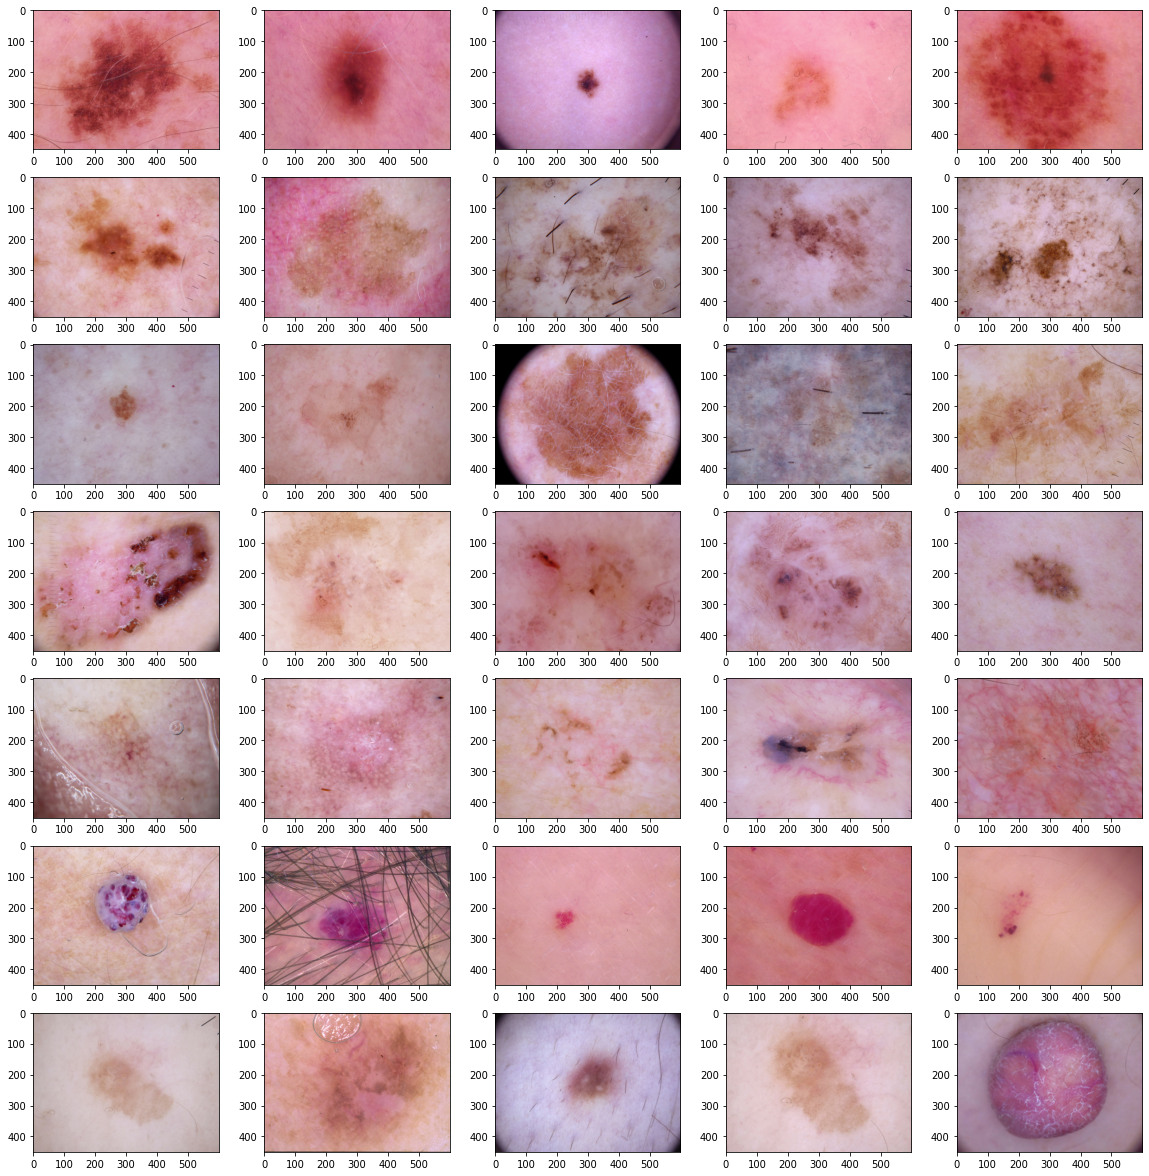

In [28]:
N_SAMPLES = 5

list_dx = df['dx'].value_counts().index.tolist()
file_dx = {}

for dx in list_dx:
    file_dx[dx] = []
    image_ids = df[df['dx']==dx].sample(N_SAMPLES).index.tolist()
    for image_id in image_ids:
        file_dx[dx].append('./dataset/Images/{}.jpg'.format(image_id))


print('Showing images for skin cancer types {}:'.format(str(list_dx)))
        
fig, axs = plt.subplots(len(list_dx),N_SAMPLES, figsize = (4 * N_SAMPLES, 3 * len(list_dx)))
for dx in list_dx:
    for image_filename in file_dx[dx]:
        image = misc.imread(image_filename)
        axs[list_dx.index(dx)][file_dx[dx].index(image_filename)].imshow(image)

In [29]:
def cnn(size, n_layers):
    # INPUTS
    # size     - size of the input images
    # n_layers - number of layers
    # OUTPUTS
    # model    - compiled CNN

    # Defining hyperparamters
    MIN_NEURONS = 64
    MAX_NEURONS = 256
    KERNEL = (3, 3)

    # Determining the # of neurons in each convolutional layer
    neurons = np.arange(MIN_NEURONS, MAX_NEURONS, MIN_NEURONS/2)
    neurons = neurons.astype(np.int32)

    # Defining a model
    model = Sequential()

    # Adding convolutional layers
    for i in range(0, n_layers):
        if i == 0:
            shape = (size[0], size[1], size[2])
            model.add(Conv2D(neurons[i], KERNEL, padding='same', input_shape=shape))
        else:
            model.add(Conv2D(neurons[i], KERNEL, padding='same'))
        
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
    
    # Adding max pooling layer 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.40))
    model.add(Flatten())
    
    model.add(Dense(MAX_NEURONS))
    model.add(Activation('relu'))
    model.add(Dropout(0.50))

    # Adding output layer
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    # Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Summary of the model
    model.summary()

    return model

In [30]:
N_LAYERS = 5
image_size = np.asarray([x_train.shape[1], x_train.shape[2], x_train.shape[3]])
model = cnn(size=image_size, n_layers=N_LAYERS)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 135, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 180, 135, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 67, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 67, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 67, 96)        55392     
_________________________________________________________________
activation_2 (Activation)    (None, 90, 67, 96)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 33, 96)      

In [31]:
# Training hyperparamters
EPOCHS = 15
BATCH_SIZE = 256

# Add a Reduction of Learning Rate to the model in case it tapers off
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=3, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

In [32]:
# Training the model
model_history = model.fit(x_train, y_train, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, callbacks=[reduce_lr])


Train on 8111 samples, validate on 902 samples
Epoch 1/15
8111/8111 [==============================] - 592s 73ms/step - loss: 1.1400 - accuracy: 0.6522 - val_loss: 1.3544 - val_accuracy: 0.6918
Epoch 2/15
8111/8111 [==============================] - 571s 70ms/step - loss: 1.0146 - accuracy: 0.6697 - val_loss: 1.2967 - val_accuracy: 0.6918
Epoch 3/15
8111/8111 [==============================] - 560s 69ms/step - loss: 0.9831 - accuracy: 0.6695 - val_loss: 1.2900 - val_accuracy: 0.6918
Epoch 4/15
8111/8111 [==============================] - 537s 66ms/step - loss: 0.9761 - accuracy: 0.6681 - val_loss: 1.0810 - val_accuracy: 0.6918
Epoch 5/15
8111/8111 [==============================] - 518s 64ms/step - loss: 0.9461 - accuracy: 0.6698 - val_loss: 1.0769 - val_accuracy: 0.6962
Epoch 6/15
8111/8111 [==============================] - 512s 63ms/step - loss: 0.9312 - accuracy: 0.6717 - val_loss: 1.0172 - val_accuracy: 0.6885
Epoch 7/15
8111/8111 [==============================] - 536s 66ms/step

In [33]:
# Evaluating the Model
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1, batch_size=BATCH_SIZE)

print("Train: accuracy = %f  ;  loss = %f" % (train_acc, train_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_acc, test_loss))

1002/1002 [==============================] - 17s 17ms/step
Train: accuracy = 0.689116  ;  loss = 0.929269
Test: accuracy = 0.675649  ;  loss = 0.991760


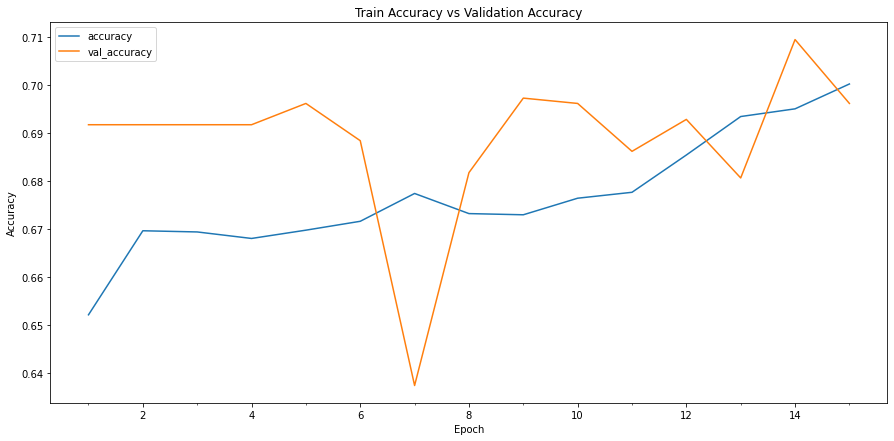

In [38]:
fig, axs = plt.subplots(1,1,figsize=(15,7))

# Plot History for Accuracy (Train vs Validation)
axs.plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
axs.plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
axs.set_title('Train Accuracy vs Validation Accuracy')
axs.set_ylabel('Accuracy')
axs.set_xlabel('Epoch')
axs.set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
axs.legend(['accuracy', 'val_accuracy'], loc='best')

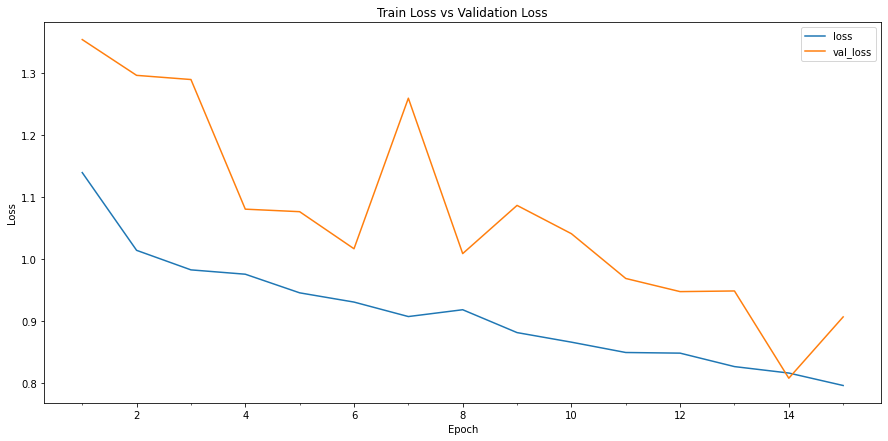

In [39]:
fig, axs = plt.subplots(1,1,figsize=(15,7))

# Plot History for Loss (Train vs Validation)
axs.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
axs.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
axs.set_title('Train Loss vs Validation Loss')
axs.set_ylabel('Loss')
axs.set_xlabel('Epoch')
axs.set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
axs.legend(['loss', 'val_loss'], loc='best')

In [40]:
# Making a prediction on the test set
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

In [41]:
# Comparing the Confusion Matrix with the value counts of the test data
confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 39,   0,   0,   0,   0,   2,   0],
       [ 42,   0,   0,   0,   0,   4,   1],
       [115,   0,   0,   0,   0,  10,   0],
       [ 14,   0,   0,   0,   0,   1,   0],
       [ 97,   0,   0,   0,   2,  11,   0],
       [237,   0,   0,   0,   0, 411,   1],
       [  9,   0,   0,   0,   0,   1,   5]], dtype=int64)

In [42]:
y_test.sum(axis=0)

dx_akiec     41
dx_bcc       47
dx_bkl      125
dx_df        15
dx_mel      110
dx_nv       649
dx_vasc      15
dtype: int64

In [43]:
# Checking the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00        15
           4       1.00      0.02      0.04       110
           5       0.93      0.63      0.75       649
           6       0.71      0.33      0.45        15

   micro avg       0.93      0.42      0.58      1002
   macro avg       0.38      0.14      0.18      1002
weighted avg       0.73      0.42      0.50      1002
 samples avg       0.42      0.42      0.42      1002



In [45]:
# Saving the Model
model.save('model-final.h5')